In [ ]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com
# ai-page.readthedocs.io

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
X = np.array([[1, 3],
             [30, 33],
              [20, 11],
              [6,4],
              [8,3],
              [7,2]])

size_chromosome  = X.shape[0] # Gens such as patterns  or individuals!
K  = 2 # NUMBER OF CLUSTERS!
W = [random.randint(1, K ) for _ in range(size_chromosome) ]

In [ ]:
def plot(log):
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "-.")
    ax1.plot(gen, fit_maxs, "orange")
    ax1.plot(gen, fit_avg, "--g")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="upper right")
    plt.grid(False)


def decode(W, K):
  cluster_book = {}
  for cluster in range(1, K+1):
    cluster_book[cluster]  = []
  for index in range(len(W)):
    cluster_book[W[index]].append(index)
  return cluster_book

def computeCentroids(features,
                     k,
                     cluster_book):
  return features[cluster_book[k]].sum(axis=0) / features[cluster_book[k]].shape[0]

def S(features , k, cluster_book):
  # calculate the within distance for the cluster K
  if X[cluster_book[k]].shape[0] == 0:
    return 999 # chage this to avoid empty clusterings
  else:
    return ((features[cluster_book[k]] -   computeCentroids(features, k, cluster_book ))**2).sum(axis=0).sum()

def Total_S(W, K, cluster_book, features):
  X = features.copy()
  # Calculate the total distance within distance from the cluster
  acum = 0
  for k in range(1,K+1):
    acum += S(X ,k, cluster_book)
  return acum

def fitness(W, K, features):
  cluster_book = decode(W, K)
  return Total_S(W,K, cluster_book, X),

In [ ]:
!pip install deap

In [ ]:
## Using deap
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [ ]:
size_chromosome  = X.shape[0]
k = 3 # Cluster number
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("cluster_id", random.randint, 1, K) # from one to K clusters, alleles
toolbox.register("individual", tools.initRepeat,  creator.Individual,   toolbox.cluster_id, size_chromosome)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 80)
toolbox.register("evaluate", lambda W: fitness(W, K , X))
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=K, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3) #change to rolloute wheel

def main():
    random.seed(1)
    CXPB, MUTPB, NGEN = 0.9, 0.1, 10
    pop  = toolbox.population()  # create the initial population
    hof  = tools.HallOfFame(1) # keep the better individual in each gestneration
    stats = tools.Statistics(lambda ind: ind.fitness.values) #to keep statistics about population in each population
    # register statiticals functions of numpy library
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook  = algorithms.eaSimple(pop, toolbox, cxpb = CXPB, mutpb = MUTPB,
                                        ngen = NGEN, stats = stats,
                                        halloffame = hof , verbose = True)
    return hof, logbook

if __name__ == "__main__":
    best, log = main()
    print("The better fitness" ,best[0].fitness.values)
    print("solution" , best[0])

gen	nevals	avg    	std    	min  	max    
0  	80    	1022.35	284.964	250.4	1298.25
1  	74    	917.245	298.931	250.4	1288.25
2  	74    	860.731	291.747	250.4	1244   
3  	73    	794.399	318.408	250.4	1288.25
4  	79    	825.489	352.442	250.4	1288.25
5  	74    	627.842	373.026	250.4	2310.33
6  	74    	473.801	302.994	250.4	1288.25
7  	72    	289.627	121.539	250.4	1049.25
8  	72    	265.383	109.534	250.4	1231.2 
9  	78    	250.4  	2.84217e-14	250.4	250.4  
10 	77    	259.161	77.8661    	250.4	951.25 
The better fitness (250.4,)
solution [1, 2, 1, 1, 1, 1]


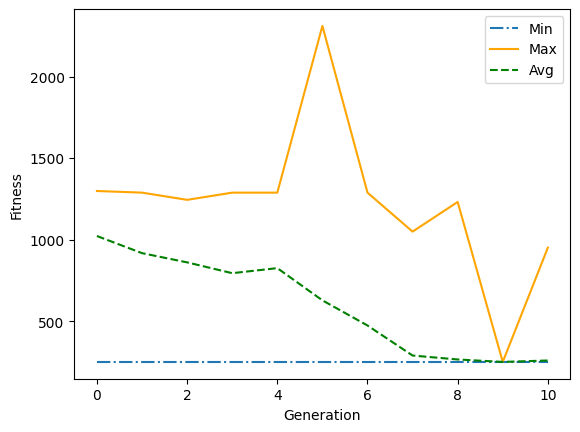

In [ ]:
plot(log)

In [ ]:
# K - means

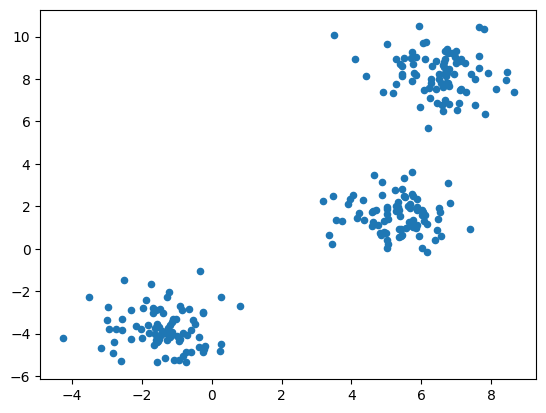

In [ ]:
###
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 250, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=231)
plt.scatter(X[:,0], X[:,1], s=20, marker='o')

In [ ]:
size_chromosome  = X.shape[0]
K = 3
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("cluster_id", random.randint, 1, K) # from one to K clusters
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.cluster_id, size_chromosome)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 80)
toolbox.register("evaluate", lambda W: fitness(W, K , X))
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=K, indpb=0.09)
toolbox.register("select", tools.selTournament, tournsize = 3) #change to rolloute wheel

def main():
    random.seed(1)
    CXPB, MUTPB, NGEN = 0.90, 0.09, 120
    pop  = toolbox.population()  # create the initial population
    hof  = tools.HallOfFame(1) # keep the better individual in each generation
    stats = tools.Statistics(lambda ind: ind.fitness.values) #to keep statistics about population in each population
    # register statiticals functions of numpy library
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook  = algorithms.eaSimple(pop, toolbox, cxpb = CXPB, mutpb = MUTPB,
                                        ngen = NGEN, stats = stats,
                                        halloffame = hof , verbose = True)
    return hof, logbook

if __name__ == "__main__":
    best, log = main()
    print("The better fitness" ,best[0].fitness.values)
    print("solution" , best[0])

gen	nevals	avg    	std   	min    	max    
0  	80    	9348.65	75.331	8976.18	9424.42
1  	75    	9322.69	91.5067	8898.72	9422.08
2  	69    	9291.18	88.8359	9007.96	9422.12
3  	69    	9216.02	132.83 	8647.5 	9415.62
4  	72    	9106.06	130.935	8647.5 	9383.33
5  	73    	9011.17	109.212	8647.5 	9289.01
6  	72    	8915.6 	146.356	8576.04	9276.74
7  	76    	8783.96	135.937	8418.57	9051.42
8  	74    	8647.82	122.864	8314.34	8872.19
9  	72    	8551.16	137.406	8192.08	8938.55
10 	67    	8435.18	122.145	8090.68	8811.26
11 	76    	8333.34	131.789	8010.64	8723.71
12 	68    	8208.11	111.026	7995.87	8579.95
13 	71    	8131.45	141.778	7840.81	8550.36
14 	71    	8029.02	132.99 	7686.56	8570.68
15 	68    	7941.07	162.202	7563.06	8730.1 
16 	67    	7843.53	155.229	7504.73	8383.33
17 	68    	7744.28	140.386	7496.62	8278.11
18 	78    	7664.4 	138.96 	7410.74	8274.16
19 	76    	7576.2 	125.693	7384.38	8123.61
20 	76    	7497.36	138.22 	7211.57	8034.04
21 	68    	7408.73	117.649	7161.15	7854.28
22 	74    	73

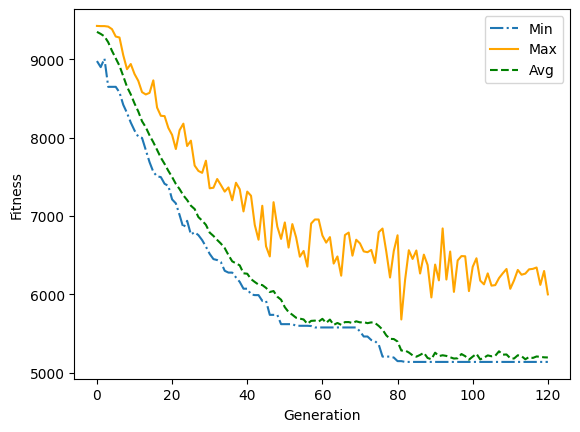

In [ ]:
plot(log)

In [ ]:
solution  = np.array(best[0])

In [ ]:
cluster_book = decode(solution, 3)

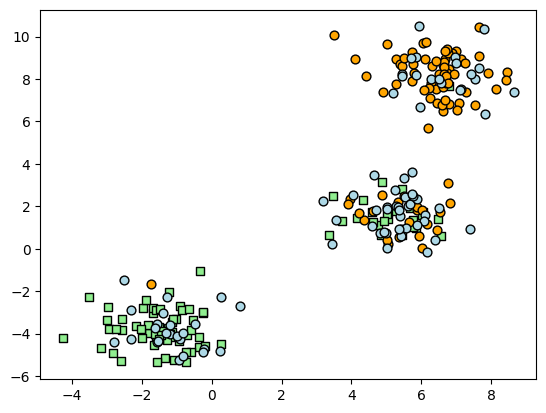

In [ ]:
plt.scatter(X[solution==1,0], X[solution==1,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[solution==2,0], X[solution==2,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[solution==3,0], X[solution==3,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')

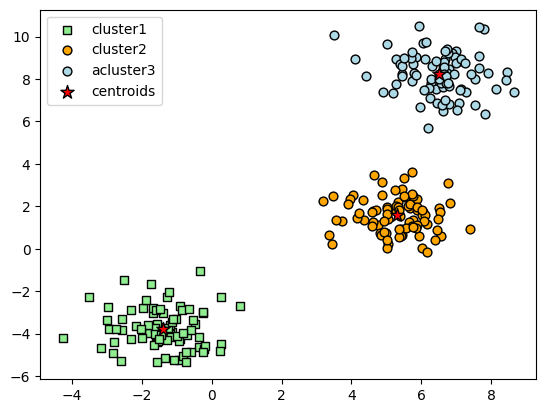

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3,
             init='random',
             n_init=12,
             max_iter=300,
             tol = 1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], X[y_km==0,1], s=40, c='lightgreen', marker='s', edgecolors='black', label = 'cluster1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=40, c='orange', marker='o', edgecolor='black', label='cluster2')
plt.scatter(X[y_km==2,0], X[y_km==2,1], s=40, c='lightblue', marker='o', edgecolor='black', label='acluster3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, marker='*', c='red', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)

In [ ]:
# Testing that works well

In [ ]:
X = np.array([[3,4],
              [5,6],
              [1,2],
              [1,2],
              [1,8]])
W   = [1,1,1,2,2]
# c1 = (3,4)
# c2 = (1,5)
# S1 = 16
# S2 = 0

In [ ]:
decode(W,2)

{1: [0, 1, 2], 2: [3, 4]}

In [ ]:
S(X, 2, decode(W,2))

18.0

In [ ]:
S(X, 2, decode(W,2))

18.0

In [ ]:
computeCentroids(X,1, decode(W,2))

array([3., 4.])

In [ ]:
Total_S(W,2,decode(W,2), X)

34.0

In [ ]:
16+18

34

In [ ]:
# Experimental results!!

In [ ]:
# Define your initial centroids
initial_centroids = np.array([[1, 2], [4, 2]])

# Create KMeans instance
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, random_state=42)
